# Synthesis
## Additive Synthesis

When we create new sounds out of the *addition* of basic sinusoids, that's called additive synthesis. Let's review some basic "recipes" for some familiar waveforms that are the result of basic additive synthesis. That is, we'll build everything by combining simple sinusoids:

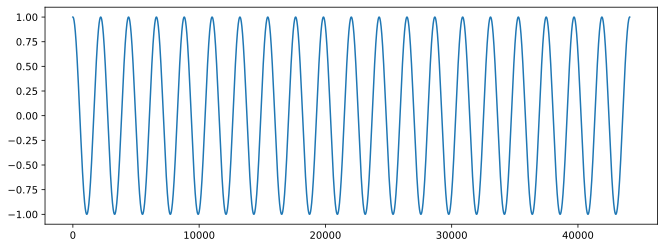

In [1]:
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (11,4)

A = 1.0
fs = 44100
f0 = 20
t = np.arange(0,fs)
phi = np.pi/2

tone = A * np.sin(2 * np.pi * f0 * t/fs + phi)

plt.plot(tone)

In [2]:
def genSine(f=None, t=1, A=1, phi=0, fs=44100):
    """
    Inputs:
    A (float) = amplitude of the sinusoid
    f (float) = frequency of the sinusoid in Hz
    phi (float) = initial phase of the sinusoid in radians
    fs (float) = sampling frequency of the sinusoid in Hz
    t (float) = duration of the sinusoid (in seconds)
    Output:
    The function should return a numpy array
    x (numpy array) = The generated sinusoid (use np.cos())
    """
    ## Your code here:
    import numpy as np
    A = float(A);
    f = float(f) if f >= 1.0 else False
    float(phi);
    fs = float(fs) if fs >= 2*f else False
    t = float(t) if t > 0.0 else False
    
    x = A * np.sin(2*np.pi*f*np.arange(0,t,1/fs) + phi)
    return(x)

In [3]:
x = genSine(80)

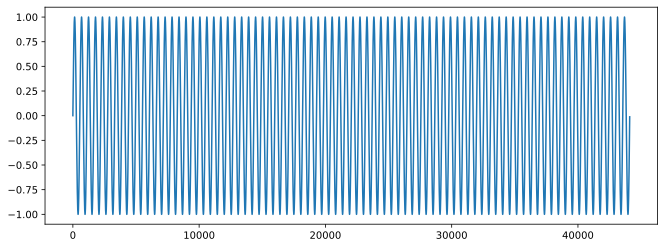

In [4]:
plt.plot(x)


In [5]:
Audio(x, rate=44100)

In [6]:
y = genSine(160)

Text(0.5, 1.0, 'combined waveform')

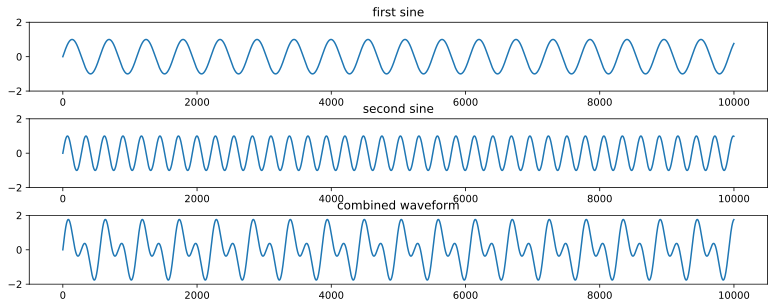

In [7]:
z = x + y

plt.subplot(3,1,1)
plt.tight_layout()
plt.plot(x[0:10000])
plt.ylim((-2,2))
plt.title('first sine')

plt.subplot(3,1,2)
plt.plot(y[0:10000])
plt.ylim((-2,2))
plt.title('second sine')

plt.subplot(3,1,3)
plt.plot(z[0:10000])
plt.ylim((-2,2))
plt.title('combined waveform')

In [ ]:
Audio(z, rate=44100) #listen to combined sinusoid

The resulting audio of two sounds added together will always equal (percpetually) those two independent sounds now sounding simultaneously.

We can demonstrate this with real audio samples:

In [ ]:
(fs, x) = read('../uploaded_files/flute-A4.wav')
(fs2, x2) = read('../uploaded_files/cello-double.wav')
Audio(x, rate=44100)

In [ ]:
x2 = x2[0:x.size]
Audio(x2, rate=44100)

In [ ]:
z = x + x2
Audio(z, rate=44100)

## Complex Tones

## Pitch perception of *complex* tones

### Harmonic signals
* A periodic (repeating) signal with **harmonics** related in integer ratios
* Lowest harmonic is called the fundamental frequency and usually corresponds to the perceived pitch
* Periodic sounds give rise to sensation of clear pitch

### Inharmonic signals
* E.g.: bells, tympani. Imprecise overall pitch; can have pitch corresponding to dominant partial or even several pitches
*  These are not periodic, but can still be described as a series of superimposed sinusoids—although the sinusoids *are no longer harmonically related*
*  **They are therefore called partials rather than harmonics**, and can take any frequency value.

### Noise
* E.g., white noise, cymbals
* Aperiodic signal (random temporal representation). Does not convey the perception of pitch.

**Importantly, ALL audio (that is, any complex wave) can be represented as a sum of sinusoidal signals or *components*.** 
The process by which a complex wave is decomposed (broken up) into a set of component sinusoids is referred to as Fourier analysis. (Coming later in the semester.)

We can create simple "recipes" for the most basic of complex waveforms, which are the combination of specific combinations of a fundamental sinusoid and various integer multiples (in Hz)

Below is a table for comparing the four types of waves we will discuss today, showing which harmonics are present and at which amplitudes:

| Waveshape | a1 | a2 | a3| a4| a5| a6| a7 | a8 | a9 | General Rule |
| ---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :------------------: |
| Sine | 1 | 0 | 0 | 0 | 0 |0 | 0 | 0 | 0 | f0 only |
| Sawtooth | 1 | 1/2 | 1/3 | 1/4 | 1/5 | 1/6 | 1/7 | 1/8 | 1/9 | 1/$x$ |
| Square | 1 | 0 | 1/3 | 0 | 1/5 | 0 | 1/7 | 0 | 1/9 | 1/$x$ for odd $x$ |
| Triangle |  1 | 0 | -1/9 | 0 | 1/25 | 0 | -1/49 | 0 | 1/81 | 1/$x^2$ for odd $x$, alternating + and - | 

### Sawtooth Waves
The recipe for sawtooth waves is to add together sine waves that are integer multiples of the fundamental frequency. The amplitude for each new (added) frequency will be the inverse of that multiple. 




Let's begin by writing a simple function that will make use of our genSine function to combine sinusoids.

In [ ]:
def addSines(numSines = None, f0 = None, t=1):
    '''function that will take the genSine function, and add integer multiples to continuousy synthesize a new 
    waveform. 
    
    numSines = the number of integer multiples of our original sinusoid (1 = s x 1; 2 = s x 2; 3 = s x 3, etc.)
    f0 = parameter to pass to the original genSine function (i.e., the frequency of the original sinusoid.)'''
    
    int(numSines) if numSines > 0 else False
    
    #f0s = f0 * np.arange(1,numSines+1)
    f0s = [(f0 * i) for i in range(1,numSines+1)]
    saw = np.vstack([genSine(f=i,t=t) for i in f0s])
    return np.sum(saw, axis=0)

#or
    #f0s = f0 * np.arange(1,numSines+1)
    #saw = np.nditer(i for i in f0s) # iterate over arrays
    

In [ ]:
mywave = addSines(10, 5)

In [ ]:
plt.plot(mywave)

OK, so notice what's happening along the y-axis here with regard to amplitude. We are effectively generating what approaches a (inverse) sawtooth wave, except that the amplitudes are too high. This is because we summed of all the harmonics without scaling their amplitudes (we added all the sine components but each with equal amplitudes). The size of the amplitudes shrinks each time by a factor of 1/n where n is the integer multiple. So, we should modify our function:

In [ ]:
def approach_saw(numSines=None, f0=None, t=1):
    '''function that will take the genSine function, and add integer multiples to continuousy synthesize a new 
    waveform. 
    
    numSines = the number of integer multiples of our original sinusoid (1 = s x 1; 2 = s x 2; 3 = s x 3, etc.)
    f0 = parameter to pass to the original genSine function (i.e., the frequency of the original sinusoid.)'''
    
    int(numSines) if numSines > 0 else False
    
    f0s = [(f0 * i) for i in range(1,numSines+1)]
    As = [(1/j) for j in range(1,numSines+1)]
    saw = np.vstack([genSine(f = i, A = j, t = t) for (i,j) in zip(f0s,As)])
    return np.sum(saw, axis=0)

In [ ]:
x = approach_saw(20,5,1) #20 integer multiples of 5hz tone over 1 second
t = np.arange(x.size)/44100
plt.plot(t,x) # plotted with respect to time instead of samples.

So we can make a bit longer sawtooth wave, and then we'll play it. Because there are a lot of harmonics, we have to be careful with amplitude, so we'll scale it down **and listen on computer with LOW volume first!**

In [ ]:
# OK, but we can't hear a 5Hz tone, so let's go back to our 60Hz tone and hear the difference...
x = approach_saw(10,60,1) #20 integer multiples of 60hz tone over 1 seconds
plt.plot(x)

The more multiples we give, the harsher the sound, because the more harmonics are being added. The fewer multiples we add, the closer to a sine wave. (Careful: A sound with more harmonics will be louder than a sound with fewer harmonics! Remember to scale down volume of sound.)

In [ ]:
x = approach_saw(10,60,2) #increase to two seconds for listening
Audio(x, rate=44100)

Listen to how the timbre changes as you add more and more harmonics....

In [ ]:
x = approach_saw(15,60,2) #increase to two seconds for listening
Audio(x, rate=44100)

In [ ]:
x = approach_saw(20,60,2) #increase to two seconds for listening
Audio(x, rate=44100)

### Square and Triangle Waves

Both square and triangle waves have no even-numbered harmonics. They are made up only of odd-numbered harmonics. The difference between the two is in the amplitude curves (or the magnitude of each harmonic present). 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sawtooth

fs=44100
t = np.arange(0,2,(1/fs))
tri20 = sawtooth(2 * np.pi * 20 * t, width=.5) #changing the "width" argument alters the shape. See docs on scipy.signal

plt.plot(t,tri20)

In [ ]:
tri60 = sawtooth(2 * np.pi * 60 * t, width=.5)
Audio(tri60, rate=44100)

As an activity, you will build functions to write your own square and triangle waves.